In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [16]:
data_path = 'data/mushrooms.csv'
df = pd.read_csv(data_path)

df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,5.41,f,h,g,f,s,d,g,4.58,...,NaN,s,g,NaN,NaN,f,f,NaN,d,a
1,e,6.44,x,s,b,f,x,c,w,6.26,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
2,p,1.19,f,s,y,f,f,f,f,3.23,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
3,p,2.83,f,d,r,f,a,NaN,r,4.57,...,NaN,t,r,NaN,NaN,f,f,NaN,m,a
4,p,2.22,b,NaN,g,f,a,NaN,g,4.81,...,NaN,s,n,NaN,NaN,f,f,NaN,d,a


## Data Exploration

In [17]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 150000 rows and 21 columns.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   class                 150000 non-null  object 
 1   cap-diameter          150000 non-null  float64
 2   cap-shape             150000 non-null  object 
 3   cap-surface           114664 non-null  object 
 4   cap-color             150000 non-null  object 
 5   does-bruise-or-bleed  150000 non-null  object 
 6   gill-attachment       126592 non-null  object 
 7   gill-spacing          87546 non-null   object 
 8   gill-color            150000 non-null  object 
 9   stem-height           150000 non-null  float64
 10  stem-width            150000 non-null  float64
 11  stem-root             21039 non-null   object 
 12  stem-surface          54094 non-null   object 
 13  stem-color            150000 non-null  object 
 14  veil-type             7675 non-null    object 
 15  

In [19]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
class                        0
cap-diameter                 0
cap-shape                    0
cap-surface              35336
cap-color                    0
does-bruise-or-bleed         0
gill-attachment          23408
gill-spacing             62454
gill-color                   0
stem-height                  0
stem-width                   0
stem-root               128961
stem-surface             95906
stem-color                   0
veil-type               142325
veil-color              131740
has-ring                     0
ring-type                 6214
spore-print-color       135738
habitat                      0
season                       0
dtype: int64


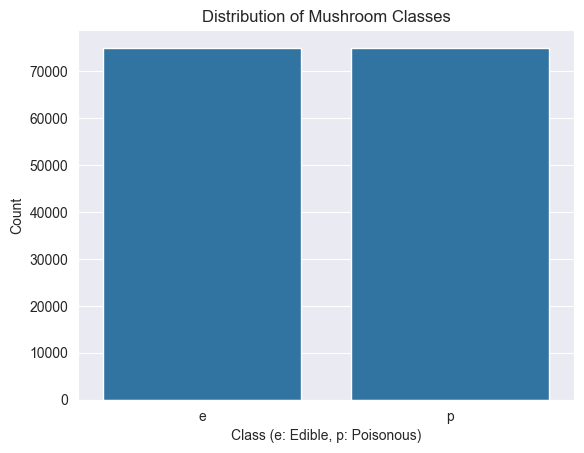

Percentage Distribution:
class
e    50.0
p    50.0
Name: count, dtype: float64


In [20]:
sns.countplot(x='class', data=df)
plt.title('Distribution of Mushroom Classes')
plt.xlabel('Class (e: Edible, p: Poisonous)')
plt.ylabel('Count')
plt.show()

class_counts = df['class'].value_counts()
print("Percentage Distribution:")
print(class_counts / len(df) * 100)

Categorical Features: ['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']


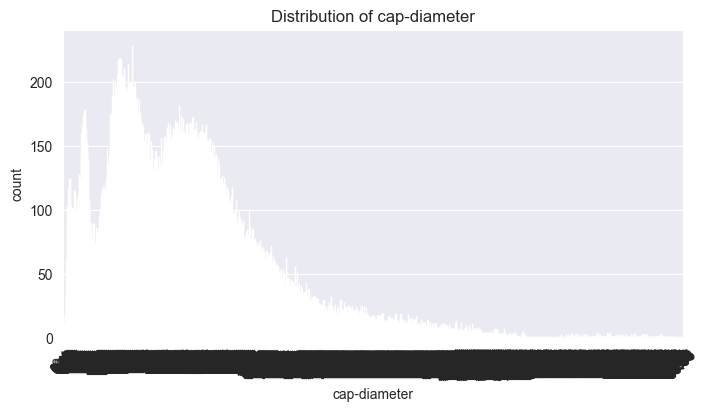

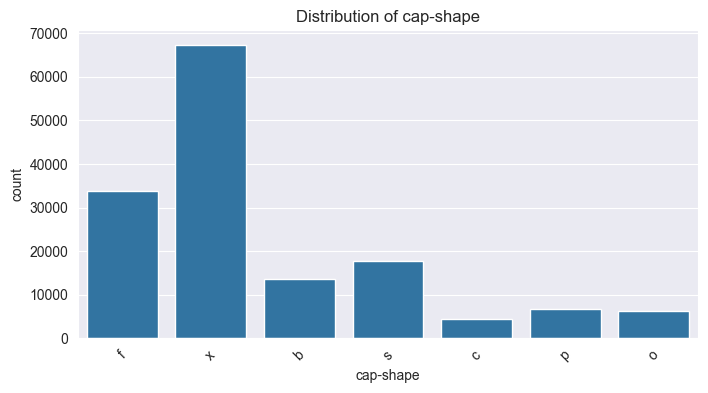

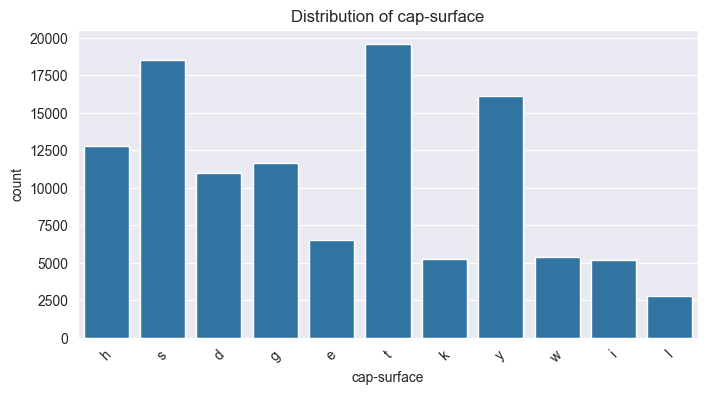

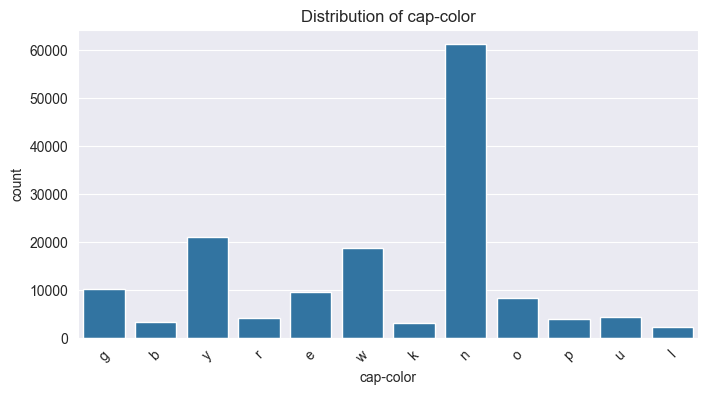

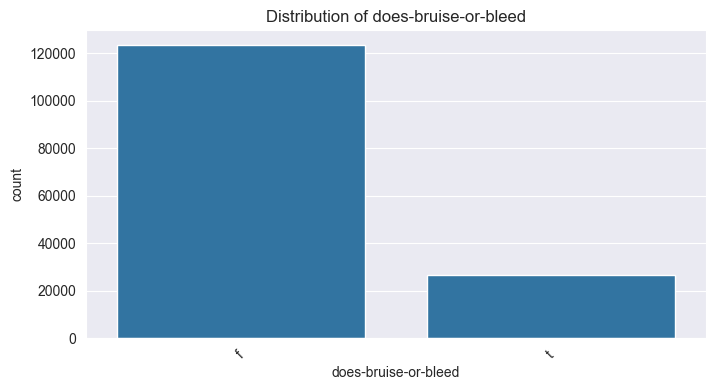

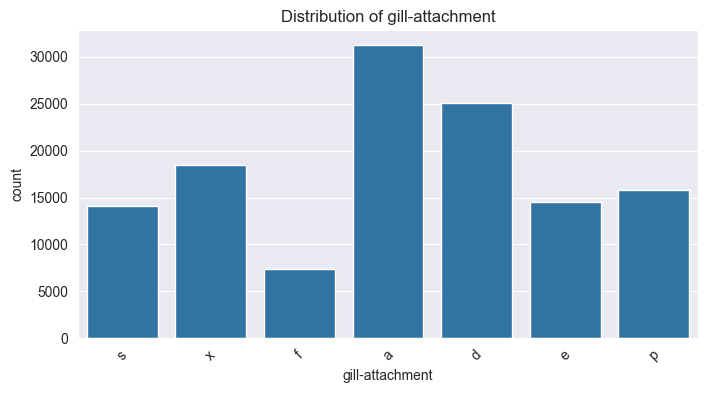

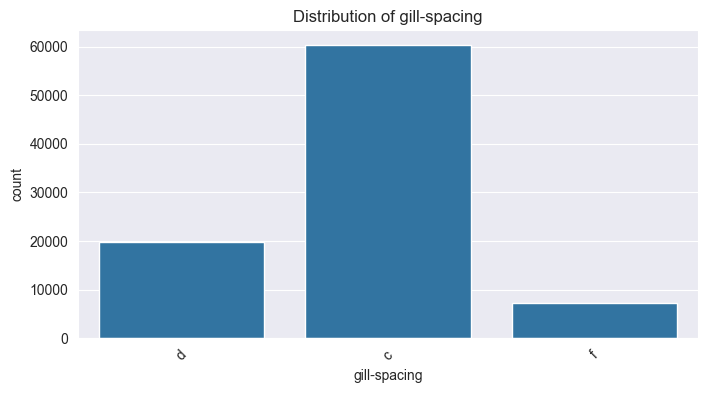

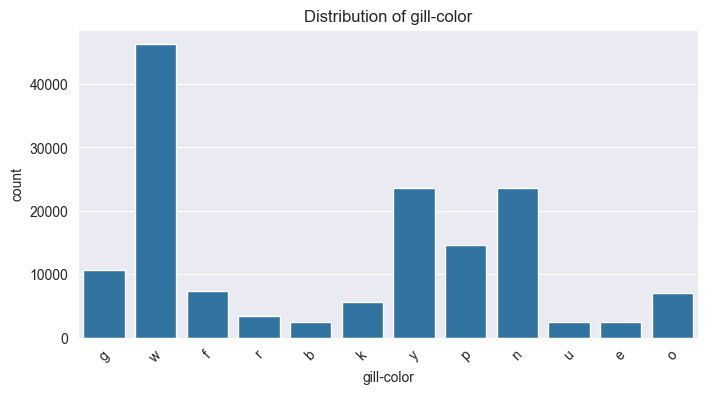

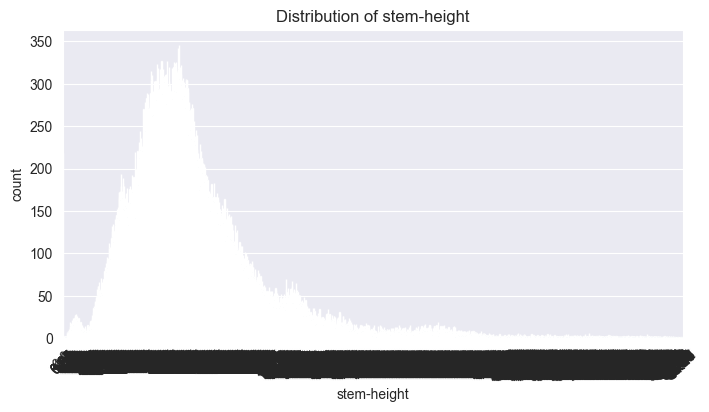

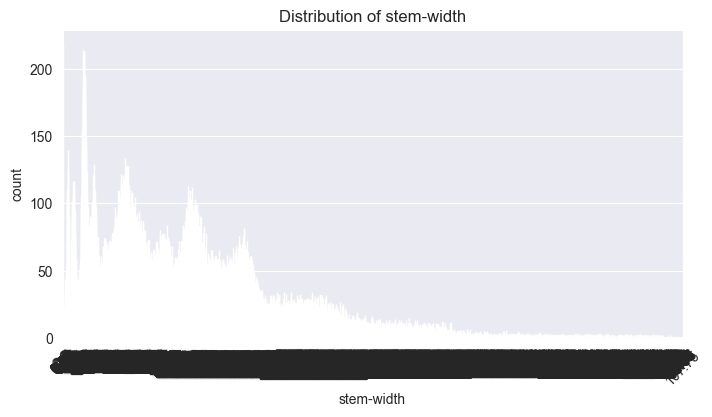

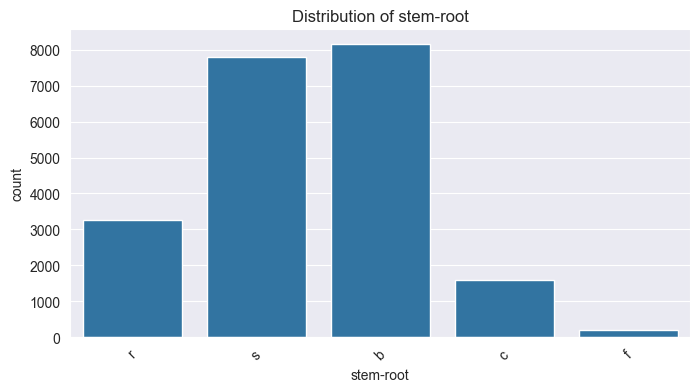

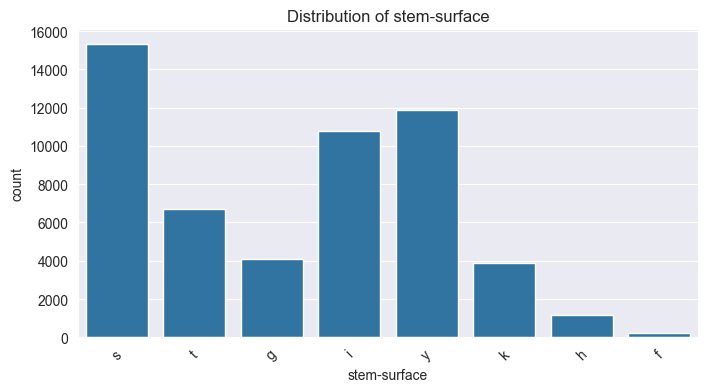

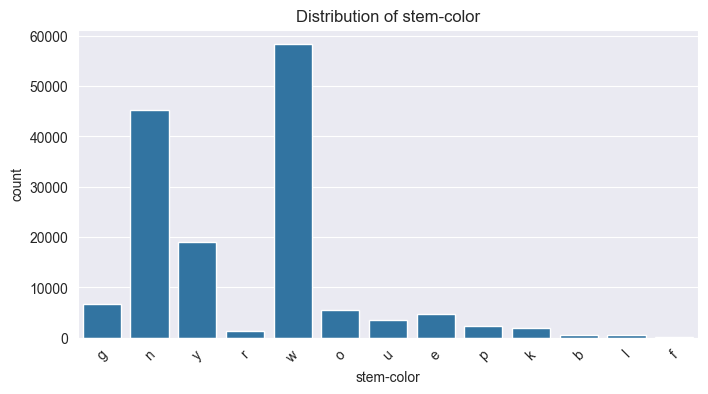

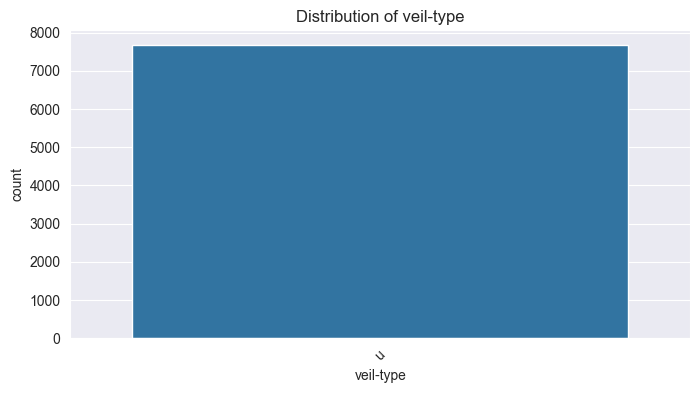

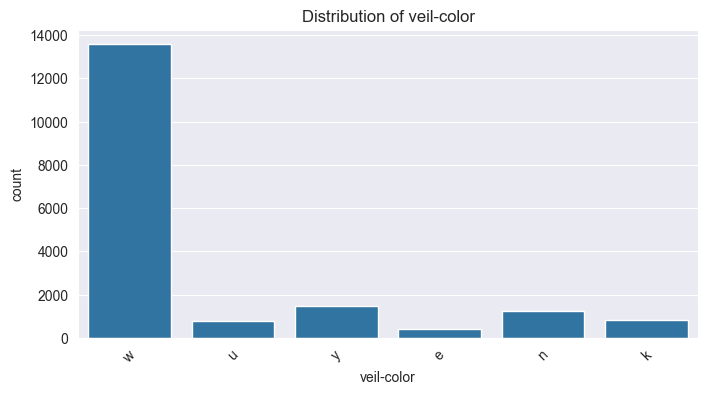

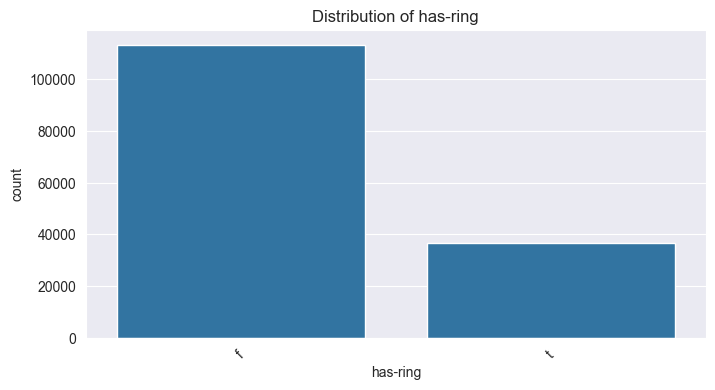

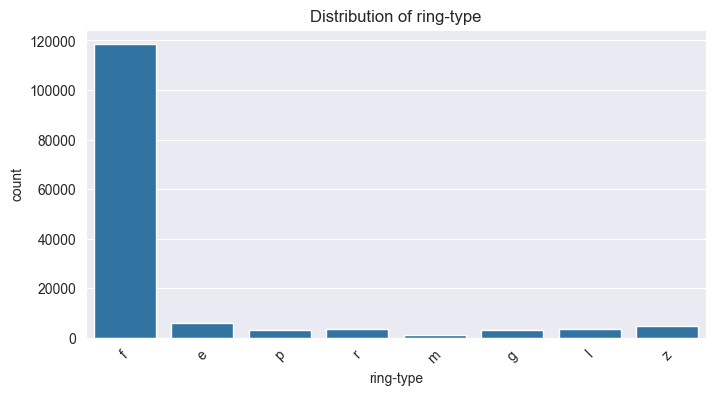

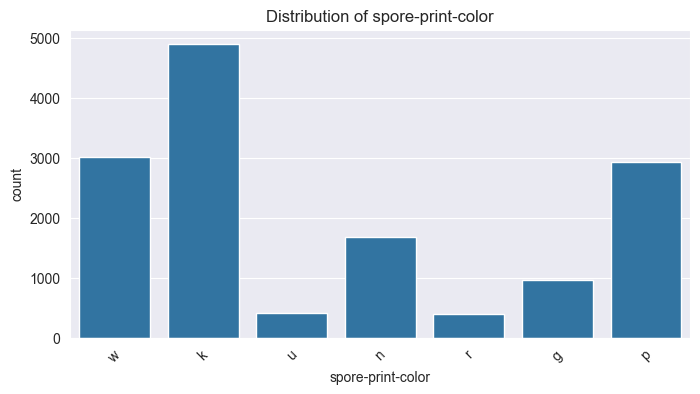

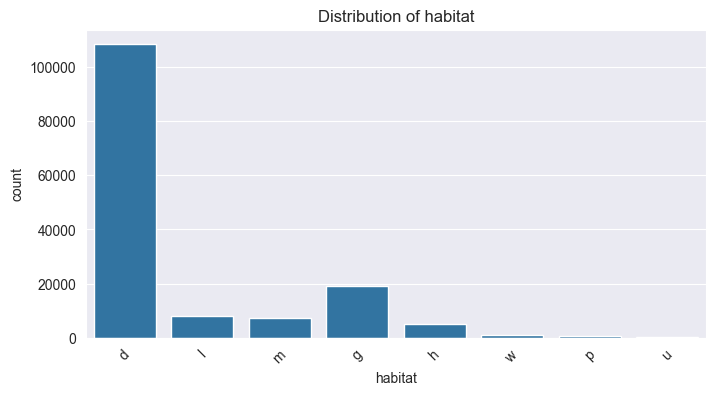

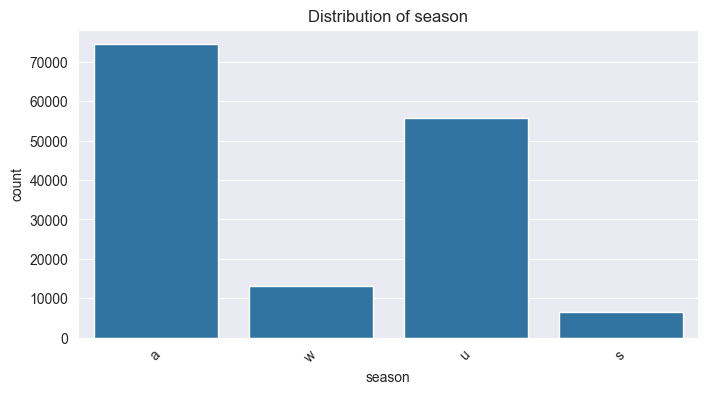

In [21]:
categorical_features = df.columns.drop('class')
print("Categorical Features:", list(categorical_features))

for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

Veil-type has only one unique value, so it can be dropped.

In [22]:
df.drop('veil-type', axis=1, inplace=True)

In [23]:
# List of numerical features
numerical_features = ['cap-diameter', 'stem-height', 'stem-width']
print("Numerical Features:", numerical_features)

Numerical Features: ['cap-diameter', 'stem-height', 'stem-width']


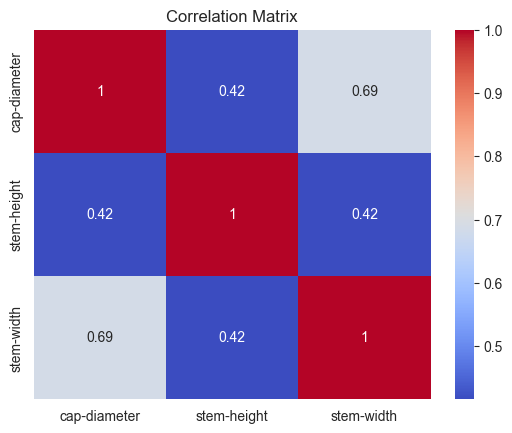

In [24]:
# Correlation matrix for numerical features
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

In [25]:
X = df.drop('class', axis=1)
y = df['class'].map({'e': 0, 'p': 1})  # 0: Edible, 1: Poisonous

In [26]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
Numerical Columns: ['cap-diameter', 'stem-height', 'stem-width']


In [27]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Save the encoder for future use

In [28]:
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 120000 samples
Testing set size: 30000 samples


## Model Training

In [30]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


In [31]:
y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous']))

Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00     15000
   Poisonous       1.00      1.00      1.00     15000

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



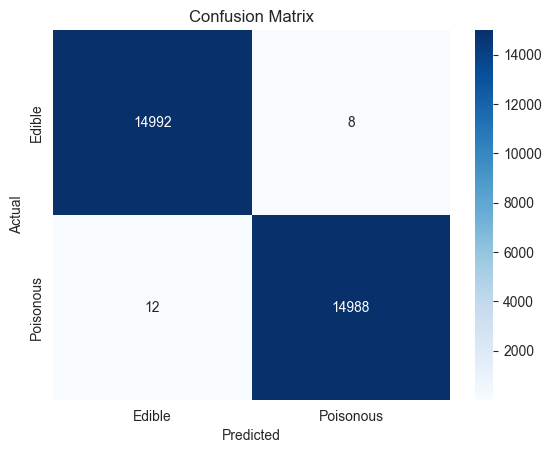

In [32]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Edible', 'Poisonous'], 
            yticklabels=['Edible', 'Poisonous'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

The dataset is synthetic, so 100% is okay here. Other notebooks on the dataset page have a similar accuracy.

In [35]:
model_path = 'models/decision_tree_model.pkl'

import os
os.makedirs(os.path.dirname(model_path), exist_ok=True)

with open(model_path, 'wb') as f:
    pickle.dump({
        'model': clf,
        'label_encoders': label_encoders,
        'scaler': scaler
    }, f)

print(f"Model saved to {model_path}")

Model saved to models/decision_tree_model.pkl
